<figure>
  <IMG SRC="LogoENSEGID.png" WIDTH=125 ALIGN="right">
</figure>

# IMPACT D'UN CHAMP CAPTANT EN NAPPE LIBRE AVEC ECOULEMENT REGIONAL

## Equation de Dupuit: rappel théorique

- Surface piézométrique initiale $\mathrm{H} = \mathrm{H(R)} = \mathrm{H_0}$
- Débit de pompage $\mathrm{Q_W}$
- Rabattement $s = s(r) = H - h(r)$
- Rabattement au puits $s_w = s(r_w) = H - h(r_w)$


<figure>
  <IMG SRC="dupuit_libre2.png" WIDTH=500 ALIGN="center">
</figure>

**Equation de continuité sur un cylindre $\lbrace{r_W, r}\rbrace $ de surface $A$:**

$$Q_{in} = Q_{out} \Longrightarrow  A \times q_r = -Q_W$$

**Loi de Darcy:**

$$q_r = - K\frac{\partial h}{\partial r}$$

En combinant les équations précédentes:
$$ -2 \pi r K h \frac{\partial h}{\partial r} = -Q_W$$
    
$$rh \frac{\partial h}{\partial r} = \frac{Q_W}{2\pi K}$$
    
$$\frac{\mathrm{d}r}{r} = \frac{2 \pi K}{Q_W}h\mathrm{d}h$$
    
En considérant les conditions limites $r = r_W \rightarrow h = h_W$ et  $r = R \rightarrow h = H_0$, on obtient:
    
$$\int_{r_W}^{R} \frac{\mathrm{d}r}{r} = \int_{h_W}^{H_0} \frac{2 \pi K}{Q_W} h\, \mathrm{d}h \Rightarrow \left[{\mathrm{ln}r} \right]^R_{r_W} = \frac{2 \pi K}{Q_W}\left[{\frac{h^2}{2}} \right]^{H_0}_{h_W}$$
    
**et in fine l'Équation de Dupuit pour une nappe libre:**
$$Q_W = \frac{\pi K}{\mathrm{ln}\frac{R}{r}}\left({H^2_0 - h^2_w} \right)$$

## Equation de Dupuit: application 1D


Equation de Dupuit


In [41]:
#Import des modules nécessaires
# Import numerical tools
import numpy as np
# Import pyplot for plotting
import matplotlib.pyplot as plt
#Import seaborn (useful for plotting)
import seaborn as sns

In [77]:
#VARIABLES AQUIFERE
K = 80 # m/jour
b = 25 # épaisseur moyenne zone saturée au repos (m)

#DEBIT PUITS
Qw = 7000 #m3/j
rw = 0.1 # rayon du puits (m)
R = 90 #rayon appel du puits (m)

#CALCUL RABATTEMENT
r = np.arange(R)
s_r = b-np.sqrt(b**2-Qw*np.log(R/(r+rw))/(np.pi*K)) #rabattement unitaire puits R




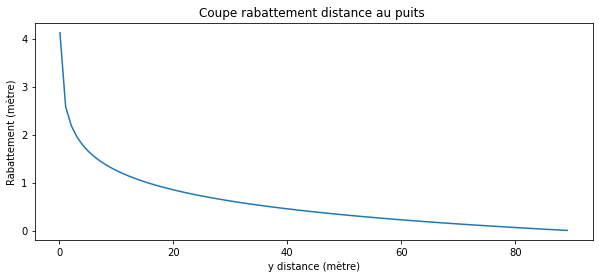

In [79]:

#Coupe rabattement
plt.figure(figsize=(10,4))
plt.plot(r+rw, s_r)
plt.xlabel('y distance (mètre)')
plt.ylabel('Rabattement (mètre)')
plt.title('Coupe rabattement distance au puits ')
plt.show()

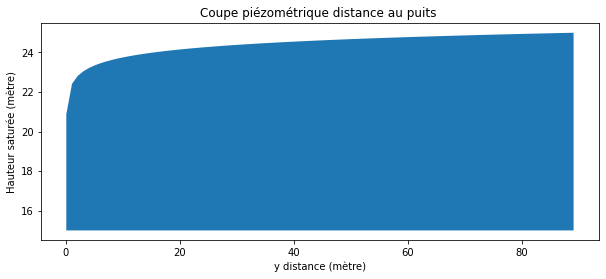

In [80]:

#Coupe piézométrique - Hauteur saturée (m)
plt.figure(figsize=(10,4))
plt.fill_between(r+rw, 25-s_r, 15)
plt.xlabel('y distance (mètre)')
plt.ylabel('Hauteur saturée (mètre)')
plt.title('Coupe piézométrique distance au puits ')
plt.show()

## Equation de Dupuit: application 2D


### Caractéristiques de l'aquifère, du champ captant et discrétisation de l'espace

In [3]:
#VARIABLES AQUIFERE
K = 86 # m/jour
b = 25 # épaisseur moyenne zone saturée au repos (m)

#DEBIT PUITS
QG = 6000 #m3/j
QH = 8000 #m3/j
QR = 4000 #m3/j

r0 = 1800 #rayon appel des puits (m)

#MISE EN PLACE GRILLE CALCUL
delx = 30 #Taille cellule

nrows = 75 #nombre de lignes
ncols = 81 #nombre de colonnes
rowvect = np.arange(nrows) #A vecteur des coordonnées de lignes
colvect = np.arange(ncols) #A vecteur des coordonnées de colonnes
colcoords, rowcoords = np.meshgrid(colvect,rowvect) #Creates two matrices. In colcoords, each 
    #entry is the column index of the cell (i.e., point in space). In rowcoords, each entry is the 
    #row index of the cell (i.e., point in space).
    
    # LOCALISATION PUITS DANS LA GRILLE DE CALCUL
loc_R = np.array([60,24]) #Index locations for the Riley well (row, column)
loc_H = np.array([30,39]) #Index locations for H well
loc_G = np.array([51,39]) #Index locations for G well
    
    #CALCULATE DISTANCES BETWEEN EACH WELL AND EVERY OTHER CELL
d_R = np.sqrt((rowcoords-loc_R[0])**2+(colcoords-loc_R[1])**2)*delx #Solve for distance (feet) using the Pythagorean theorem
d_H = np.sqrt((rowcoords-loc_H[0])**2+(colcoords-loc_H[1])**2)*delx #Solve for distance (feet) using the Pythagorean theorem
d_G = np.sqrt((rowcoords-loc_G[0])**2+(colcoords-loc_G[1])**2)*delx #Solve for distance (feet) using the Pythagorean theorem

    #SET DISTANCES TO WELL IN CELLS WITH WELL TO 8 m (TO AVOID SINGULARITY AT 0)
d_R[60,24] = 8 #m
d_H[30,39] = 8 #m
d_G[51,39] = 8 #m

### Calcul du rabattement généré par le dispositif de pompage (3 puits)

In [4]:
   #CALCUL RABATTEMENT POUR CHAQUE PUITS
s_R = b-np.sqrt(b**2-QR*np.log(r0/d_R)/(np.pi*K)) #rabattement unitaire puits R
s_H = b-np.sqrt(b**2-QH*np.log(r0/d_H)/(np.pi*K)) #rabattement unitaire puits H
s_G = b-np.sqrt(b**2-QG*np.log(r0/d_G)/(np.pi*K)) #rabattement unitaire puits G
s_total = s_R+s_H+s_G #Rabattement total des 3 puits

Carte rabattement 2D - Influence des puits

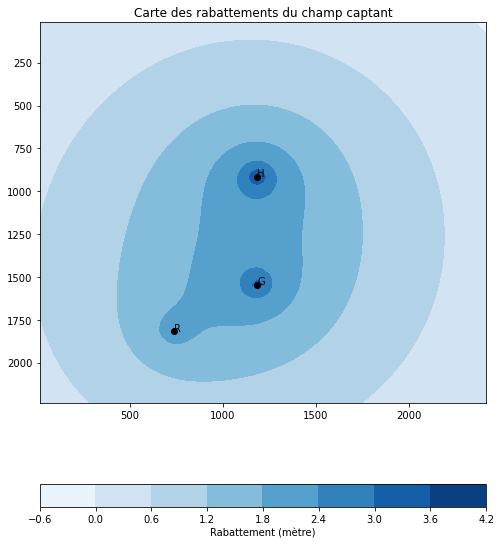

In [6]:
plt.figure(figsize=(8,10))
s_plot = plt.contourf(((colcoords+0.5)*delx),((rowcoords+0.5)*delx),(s_total), cmap='Blues')
plt.gca().invert_yaxis() #This puts the origin of the plot on the upper left
cb = plt.colorbar(s_plot, orientation='horizontal')
cb.set_label('Rabattement (mètre)')
wH = plt.plot((loc_H[1]+0.5)*delx, (loc_H[0]+0.5)*delx, 'ko') #identification graphique du puits H
wG = plt.plot((loc_G[1]+0.5)*delx, (loc_G[0]+0.5)*delx, 'ko')
wR = plt.plot((loc_R[1]+0.5)*delx, (loc_R[0]+0.5)*delx, 'ko')
ax = plt.gca()
ax.annotate('H', xy = ((loc_H[1]+0.5)*delx, (loc_H[0]+0.5)*delx))
ax.annotate('G', xy = ((loc_G[1]+0.5)*delx, (loc_G[0]+0.5)*delx))
ax.annotate('R', xy = ((loc_R[1]+0.5)*delx, (loc_R[0]+0.5)*delx))
#plt.axis('equal') #Decommenter pour mettre axe x et y à la même echelle
plt.title('Carte des rabattements du champ captant')
plt.show()


Coupe rabattement Nord-Sud passant par les puits H et G - impact champ captant

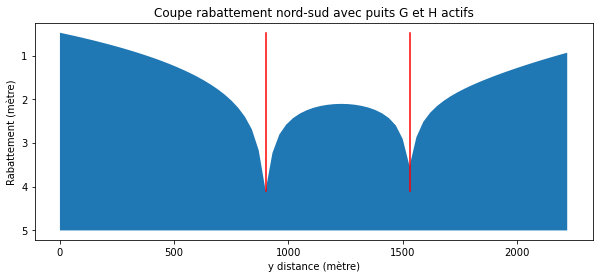

In [101]:
plt.figure(figsize=(10,4))
plt.fill_between(rowvect*delx, max(np.ceil(s_total[:,39])), s_total[:,39])
plt.plot([loc_H[0]*delx, loc_H[0]*delx], [min(s_total[:,39]), max(s_total[:,39])], 'r')
plt.plot([loc_G[0]*delx, loc_G[0]*delx], [min(s_total[:,39]), max(s_total[:,39])], 'r')
plt.gca().invert_yaxis()
plt.xlabel('y distance (mètre)')
plt.ylabel('Rabattement (mètre)')
plt.title('Coupe rabattement nord-sud avec puits G et H actifs')
plt.show()

### Prise en compte d'un écoulement régional - Création d'une carte piézométrique
Calcul du rabattement généré par l'écoulement naturel (gradient hydraulique Nord-Sud) et calcul de l'épaisseur saturée, en prenant une épaisseur saturée globale homogène sur la zone.

In [81]:
    #ECOULEMENT NATUREL - RABATTEMENT NAPPE
H0 = 25 # mN Hauteur piézométrique de référence --> épaisseur saturee pour une nappe libre
s_nappe = rowcoords*0.01 # gradient naturel nord sud de 1%
H_nappe = H0-s_nappe

Carte piézométrique 2D (épaisseur saturée m) - Ecoulement naturel

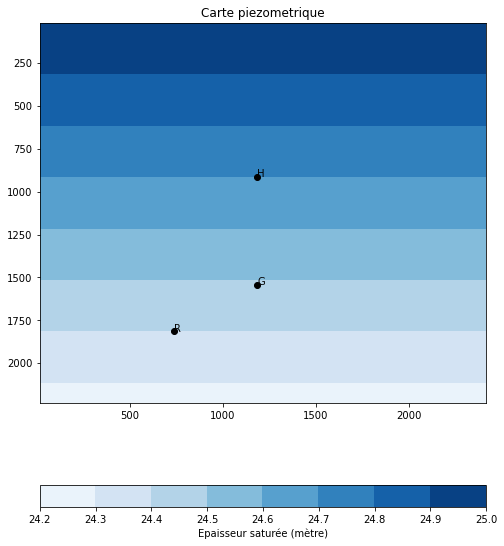

In [32]:
plt.figure(figsize=(8,10))
s_plot = plt.contourf(((colcoords+0.5)*delx),((rowcoords+0.5)*delx),(H_nappe), cmap='Blues')
plt.gca().invert_yaxis() #This puts the origin of the plot on the upper left
cb = plt.colorbar(s_plot, orientation='horizontal')
cb.set_label('Epaisseur saturée (mètre)')
wH = plt.plot((loc_H[1]+0.5)*delx, (loc_H[0]+0.5)*delx, 'ko') #identification graphique du puits H
wG = plt.plot((loc_G[1]+0.5)*delx, (loc_G[0]+0.5)*delx, 'ko')
wR = plt.plot((loc_R[1]+0.5)*delx, (loc_R[0]+0.5)*delx, 'ko')
ax = plt.gca()
ax.annotate('H', xy = ((loc_H[1]+0.5)*delx, (loc_H[0]+0.5)*delx))
ax.annotate('G', xy = ((loc_G[1]+0.5)*delx, (loc_G[0]+0.5)*delx))
ax.annotate('R', xy = ((loc_R[1]+0.5)*delx, (loc_R[0]+0.5)*delx))
#plt.axis('equal') #Decommenter pour mettre axe x et y à la même echelle
plt.title('Carte piezometrique')
plt.show()

Coupe piézométrique Nord-Sud passant par les puits H et G - Ecoulement naturel

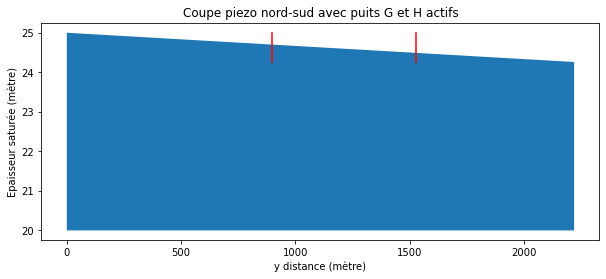

In [33]:
plt.figure(figsize=(10,4))
#plt.fill_between(rowvect*delx, H_nappe[:,39], min(np.ceil(H_nappe[:,39])))
plt.fill_between(rowvect*delx, 20, H_nappe[:,39])

plt.plot([loc_H[0]*delx, loc_H[0]*delx], [min(H_nappe[:,39]), max(H_nappe[:,39])], 'r')
plt.plot([loc_G[0]*delx, loc_G[0]*delx], [min(H_nappe[:,39]), max(H_nappe[:,39])], 'r')
#plt.gca().invert_yaxis()
plt.xlabel('y distance (mètre)')
plt.ylabel('Epaisseur saturée (mètre)')
plt.title('Coupe piezo nord-sud avec puits G et H actifs')
plt.show()


### Création d'une carte piézométrique synthétique

Carte piézométrique en régime influencé

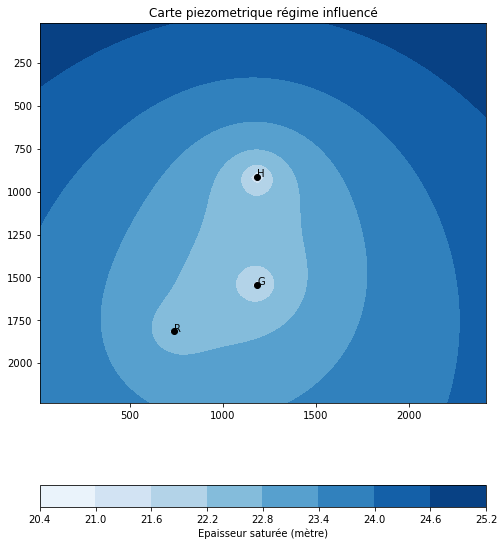

In [34]:
    #RABATTEMENT NAPPE TOTAL
H_compose = H_nappe - s_total


plt.figure(figsize=(8,10))
s_plot = plt.contourf(((colcoords+0.5)*delx),((rowcoords+0.5)*delx),(H_compose), cmap='Blues')
plt.gca().invert_yaxis() #This puts the origin of the plot on the upper left
cb = plt.colorbar(s_plot, orientation='horizontal')
cb.set_label('Epaisseur saturée (mètre)')
wH = plt.plot((loc_H[1]+0.5)*delx, (loc_H[0]+0.5)*delx, 'ko') #identification graphique du puits H
wG = plt.plot((loc_G[1]+0.5)*delx, (loc_G[0]+0.5)*delx, 'ko')
wR = plt.plot((loc_R[1]+0.5)*delx, (loc_R[0]+0.5)*delx, 'ko')
ax = plt.gca()
ax.annotate('H', xy = ((loc_H[1]+0.5)*delx, (loc_H[0]+0.5)*delx))
ax.annotate('G', xy = ((loc_G[1]+0.5)*delx, (loc_G[0]+0.5)*delx))
ax.annotate('R', xy = ((loc_R[1]+0.5)*delx, (loc_R[0]+0.5)*delx))
#plt.axis('equal') #Decommenter pour mettre axe x et y à la même echelle
plt.title('Carte piezometrique régime influencé')
plt.show()

Coupe piézométrique Nord-Sud passant par les puitsd H et G - Régime influencé

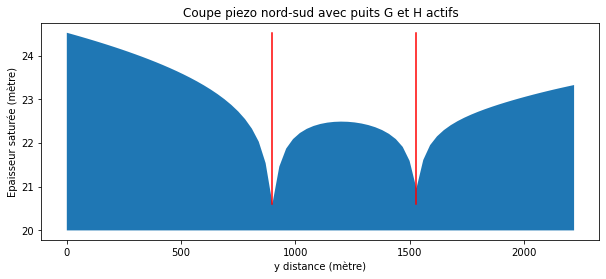

In [35]:
plt.figure(figsize=(10,4))
#plt.fill_between(rowvect*delx, H_nappe[:,39], min(np.ceil(H_nappe[:,39])))
plt.fill_between(rowvect*delx, 20, H_compose[:,39])
plt.plot([loc_H[0]*delx, loc_H[0]*delx], [min(H_compose[:,39]), max(H_compose[:,39])], 'r')
plt.plot([loc_G[0]*delx, loc_G[0]*delx], [min(H_compose[:,39]), max(H_compose[:,39])], 'r')
#plt.gca().invert_yaxis()
plt.xlabel('y distance (mètre)')
plt.ylabel('Epaisseur saturée (mètre)')
plt.title('Coupe piezo nord-sud avec puits G et H actifs')
plt.show()

Surface piézométrique en régime influencé - Vue pseudo-3D

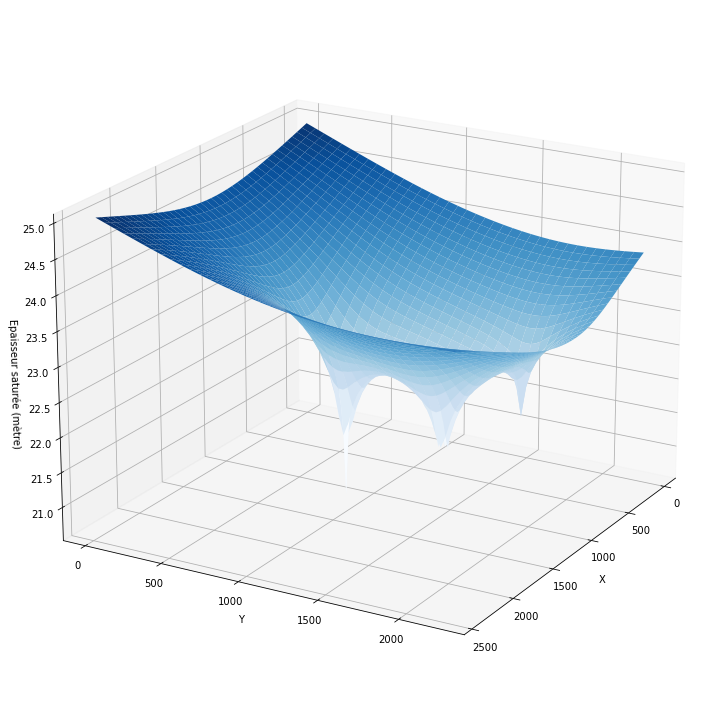

In [95]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_surface(np.transpose((colcoords+0.5)*delx), np.transpose((rowcoords+0.5)*delx), np.transpose(H_compose),cmap='Blues')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Epaisseur saturée (mètre)')
ax.view_init(20,30)
plt.show()

